In [6]:
%load_ext autoreload
%autoreload 2
import os
import sys
sys.path.insert(0, os.path.abspath('../src/'))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from structure_factor.structure_factor_new import StructureFactor
from structure_factor.spatstat_interface import SpatstatInterface
from structure_factor.spatial_windows import UnitBoxWindow


# testing the calss StructureFactor

In [9]:
#importing big data
import pickle
import rpy2.robjects as robjects
with open('/Users/dhawat/github/structure-factor/data/data_big_intensity.dat', 'rb') as pickle_file:
    r_poisson, n_pois, poisson, push, equi, t_max, t_max_e = pickle.load(pickle_file, encoding="bytes")

with open('/Users/dhawat/github/structure-factor/data/big_gin_1.dat', 'rb') as pickle_file_2:
    n_ginibre, ginibre = pickle.load(pickle_file_2, encoding="bytes")

robjects.r['load']("/Users/dhawat/github/structure-factor/data/data_klatt_2.dat")
data_R_2 = robjects.r['out_2']
data_klatt_all = np.array(data_R_2)

In [10]:
print("data_klatt.shape", data_klatt_all.shape)
print("data_poisson.shape", poisson.shape)
print("data_ginibre.shape", ginibre.shape )

data_klatt.shape (90000, 4)
data_poisson.shape (808678, 1)
data_ginibre.shape (10000, 1)


In [11]:
#load big data in the corresponding shape :math: `n /times 2`
data_poisson = np.array([np.array(np.real(poisson)).reshape(-1,), np.array(np.imag(poisson)).reshape(-1,)]).T
data_equi = np.array([np.array(np.real(equi)).reshape(-1,), np.array(np.imag(equi)).reshape(-1,)]).T
data_push = np.array([np.array(np.real(push)).reshape(-1,), np.array(np.imag(push)).reshape(-1,)]).T
data_ginibre = np.array([np.array(np.real(ginibre)).reshape(-1,), np.array(np.imag(ginibre)).reshape(-1,)]).T
data_klatt = np.array([data_klatt_all[:,0], data_klatt_all[:,1]]).T
data_z_2 = np.array([data_klatt_all[:,2], data_klatt_all[:,3]]).T

In [12]:
#verifying the shape
print("data_klatt.shape", data_klatt.shape)
print("data_poisson.shape", data_poisson.shape)
print("data_ginibre.shape", data_ginibre.shape )

data_klatt.shape (90000, 2)
data_poisson.shape (808678, 2)
data_ginibre.shape (10000, 2)


In [13]:
# truncating data_poisson, data_equi, data_push in a cubic window
# poisson, push , equi and ginibre are contained in a ball while klatt and z_2 are in a rectangular window L = 300
raduis_poisson = np.max(np.abs(poisson)) -32
L_poisson = np.floor(raduis_poisson/np.sqrt(2))
index_poisson_in_cube = np.logical_and((np.abs(data_poisson[:,0]) < (L_poisson/2)) , (np.abs(data_poisson[:,1]) < (L_poisson/2)))
data_poisson_cube = data_poisson[index_poisson_in_cube]

index_push_in_cube = np.logical_and((np.abs(data_push[:,0]) < L_poisson/2) , (np.abs(data_push[:,1]) < L_poisson/2))
data_push_cube = data_push[index_push_in_cube]

index_equi_in_cube = np.logical_and((np.abs(data_equi[:,0]) < (L_poisson/2)) , (np.abs(data_equi[:,1]) < (L_poisson/2)))
data_equi_cube = data_equi[index_equi_in_cube]

raduis_ginibre = np.max(np.abs(ginibre))
L_ginibre = raduis_ginibre/np.sqrt(2)
index_ginibre_in_cube = np.logical_and((np.abs(data_ginibre[:,0]) < L_ginibre/2) , (np.abs(data_ginibre[:,1]) < L_ginibre/2))
data_ginibre_cube = data_ginibre[index_ginibre_in_cube]

In [25]:
ginibre.shape

(10000, 1)

In [34]:
sf_poisson = StructureFactor(data_poisson, intensity=1/np.pi )
sf_poisson_cube = StructureFactor(data_poisson_cube, intensity=1/np.pi )

sf_push = StructureFactor(data_push, intensity=1/np.pi )
sf_puhs_cube = StructureFactor(data_push_cube, intensity=1/np.pi )

sf_equi = StructureFactor(data_equi, intensity=1/np.pi )
sf_equi_cube = StructureFactor(data_equi_cube, intensity = 1/np.pi )

sf_ginibre = StructureFactor(data_ginibre, intensity=1/np.pi )
sf_ginibre_cube = StructureFactor(data_ginibre_cube, intensity = 1/np.pi )

sf_klatt = StructureFactor(data_klatt, intensity= 1)
sf_z_2 = StructureFactor(data_z_2, intensity=1)

## test the method get ``compute_scattering_intensity`` of the calss StructureFactor

In [35]:
aa, bb = sf_poisson_cube.compute_scattering_intensity(L=L_poisson,maximum_wave =20,meshgrid_size=None,plot_param="true",bins_number=40,plot_type="color_level")

ValueError: not enough values to unpack (expected 2, got 1)

In [24]:
wave_poisson_2, si_poisson_cube_2 = sf_poisson_cube.compute_scattering_intensity(L=L_poisson, maximum_wave=10,meshgrid_size=40,plot_param="true",bins_number=40,plot_type="all")

NameError: name 'self' is not defined

In [18]:
# on vector of waves
wave_poisson, si_poisson_cube = sf_poisson_cube.compute_scattering_intensity(L=L_poisson, maximum_wave=20)
wave_equi, si_equi_cube = sf_equi_cube.compute_scattering_intensity(L=L_poisson, maximum_wave=20)
wave_klatt, si_klatt = sf_klatt.compute_scattering_intensity(L=300, maximum_wave=20)
wave_z_2, si_z_2 = sf_z_2.compute_scattering_intensity(L=300, maximum_wave=20)
wave_ginibre, si_ginibre_cube = sf_ginibre_cube.compute_scattering_intensity(L=L_ginibre, maximum_wave=20)


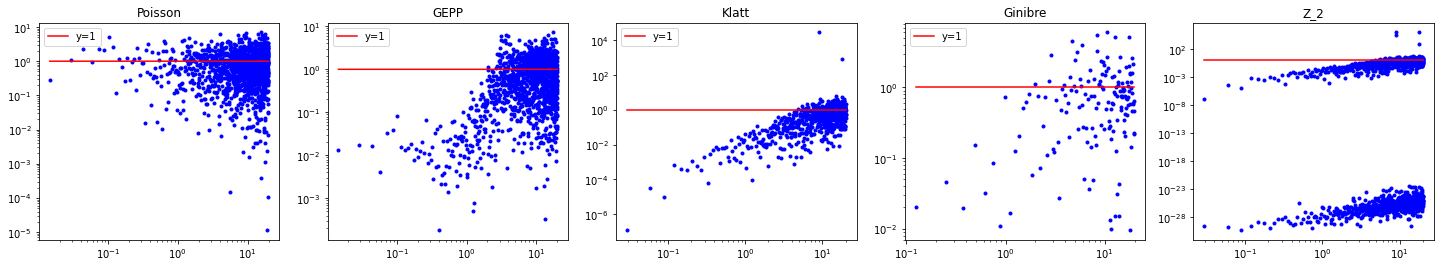

In [19]:
fig, ax = plt.subplots(1, 5, figsize=(25, 4))
ax[0].loglog(wave_poisson, si_poisson_cube, 'b.')
ax[0].loglog(wave_poisson, np.ones_like(wave_poisson), 'r-', label="y=1")
ax[0].legend()
ax[0].title.set_text("Poisson")
ax[1].loglog(wave_equi, si_equi_cube, 'b.')
ax[1].loglog(wave_poisson, np.ones_like(wave_poisson), 'r-', label="y=1")
ax[1].legend()
ax[1].title.set_text("GEPP")
ax[2].loglog(wave_klatt, si_klatt, 'b.')
ax[2].loglog(wave_klatt, np.ones_like(wave_klatt), 'r-', label="y=1")
ax[2].legend()
ax[2].title.set_text("Klatt")
ax[3].loglog(wave_ginibre, si_ginibre_cube, 'b.')
ax[3].loglog(wave_ginibre, np.ones_like(wave_ginibre), 'r-', label="y=1")
ax[3].legend()
ax[3].title.set_text("Ginibre")
ax[4].loglog(wave_z_2, si_z_2, 'b.')
ax[4].loglog(wave_klatt, si_klatt, 'b.')
ax[4].loglog(wave_klatt, np.ones_like(wave_klatt), 'r-', label="y=1")
ax[4].title.set_text("Z_2")
plt.show()


In [ ]:
plt.hist()

In [161]:
# on meshgrid of waves
wave_poisson_2, si_poisson_cube_2 = sf_poisson_cube.compute_scattering_intensity(L=L_poisson, maximum_wave=10,meshgrid_size=50)
wave_equi_2, si_equi_cube_2 = sf_equi_cube.compute_scattering_intensity(L=L_poisson, maximum_wave=20, meshgrid_size=50)
wave_klatt_2, si_klatt_2 = sf_klatt.compute_scattering_intensity(L=300, maximum_wave=20,meshgrid_size=50)
wave_z_2_2, si_z_2_2 = sf_z_2.compute_scattering_intensity(L=300, maximum_wave=20,meshgrid_size=50)
wave_ginibre_2, si_ginibre_cube_2 = sf_ginibre_cube.compute_scattering_intensity(L=L_ginibre, maximum_wave=20, meshgrid_size=50)

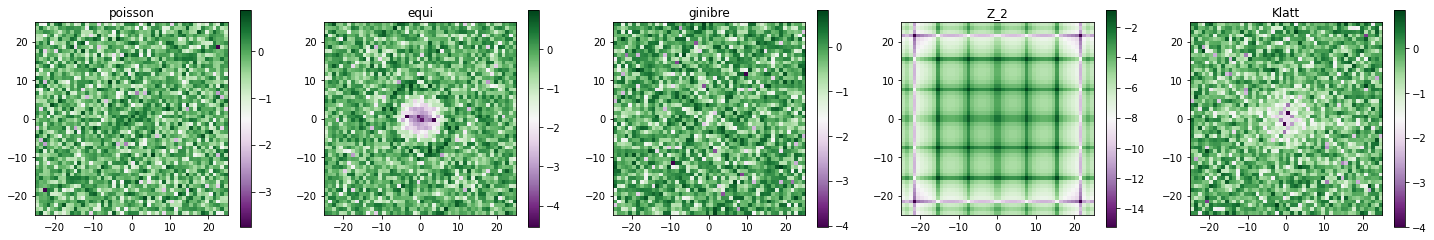

In [162]:
fig, ax = plt.subplots(1, 5, figsize=(25, 4))
lg_si_pois = np.log10(si_poisson_cube_2)
f_0 = ax[0].imshow(lg_si_pois , extent=[ -lg_si_pois.shape[1] / 2.0,lg_si_pois.shape[1] / 2.0,-lg_si_pois.shape[0] / 2.0,lg_si_pois.shape[0] / 2.0,],cmap="PRGn",)
fig.colorbar(f_0, ax=ax[0])
ax[0].title.set_text("poisson")

lg_si_equi = np.log10(si_equi_cube_2)
f_1 = ax[1].imshow(lg_si_equi , extent=[-lg_si_equi.shape[1] / 2.0,lg_si_equi.shape[1] / 2.0,-lg_si_equi.shape[0] / 2.0,lg_si_equi.shape[0] / 2.0,],cmap="PRGn",)
fig.colorbar(f_1, ax=ax[1])
ax[1].title.set_text("equi")

lg_si_ginibre = np.log10(si_ginibre_cube_2)
f_2 = ax[2].imshow(lg_si_ginibre , extent=[-lg_si_ginibre.shape[1] / 2.0,lg_si_ginibre.shape[1] / 2.0,-lg_si_ginibre.shape[0] / 2.0,lg_si_ginibre.shape[0] / 2.0,],cmap="PRGn",)
ax[2].title.set_text("ginibre")
fig.colorbar(f_2, ax=ax[2])

lg_si_z_2 = np.log10(si_z_2_2)
f_3 = ax[3].imshow(lg_si_z_2 , extent=[-lg_si_z_2.shape[1] / 2.0,lg_si_z_2.shape[1] / 2.0,-lg_si_z_2.shape[0] / 2.0,lg_si_z_2.shape[0] / 2.0,],cmap="PRGn",)
fig.colorbar(f_3, ax=ax[3])
ax[3].title.set_text("Z_2")

lg_si_klatt = np.log10(si_klatt_2)
f_4 = ax[4].imshow(lg_si_klatt , extent=[-lg_si_klatt.shape[1] / 2.0,lg_si_klatt.shape[1] / 2.0,-lg_si_klatt.shape[0] / 2.0,lg_si_klatt.shape[0] / 2.0,],cmap="PRGn",)
fig.colorbar(f_4, ax=ax[4])
ax[4].title.set_text("Klatt")
plt.show()


## testing ``compute_pcf`` of the calss StructureFactor

In [20]:
exact_pcf_ginibre = lambda x : 1 - np.exp(-x**2)
exact_h_ginibre = lambda x : - np.exp(-x**2)
exact_sf_ginibre = lambda x : 1 - np.exp(-x**2/4)

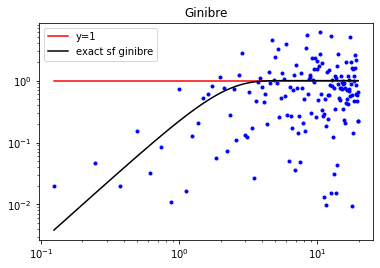

In [21]:
plt.loglog(wave_ginibre, si_ginibre_cube, 'b.')
plt.loglog(wave_ginibre, np.ones_like(wave_ginibre), 'r-', label="y=1")
plt.loglog(wave_ginibre, exact_sf_ginibre(wave_ginibre), 'k', label ="exact sf ginibre")
plt.title("Ginibre")
plt.legend()
plt.show()

In [72]:
def binning_function (r_vector, data, bins_number):
    step = (np.max(r_vector) - np.min(r_vector))/bins_number
    binned_data = []
    binned_r = []
    for i in range(1, bins_number +1):
        index = (r_vector <=np.min(r_vector) +i*step) & (r_vector >= np.min(r_vector +(i-1)*step) )
        binned_r.append(np.mean(r_vector[index]))
        binned_data.append(np.mean(data[index]))
    print(np.min(r_vector) +i*step, np.max(r_vector))
    return (binned_r, binned_data)


In [70]:
wave_binned_gin

[0.559238544901927,
 0.6213761610021411,
 0.6835137771023553,
 0.6835137771023553,
 0.7456513932025695,
 0.7456513932025695,
 0.8077890093027835,
 0.8077890093027835,
 0.8699266254029977,
 0.8699266254029977,
 0.9320642415032117,
 0.9320642415032117,
 0.9942018576034258,
 0.9942018576034258,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,

19.884037152068515 19.884037152068515


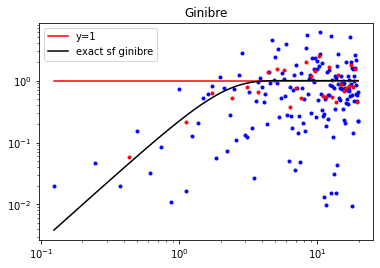

In [74]:
wave_binned_gin, binned_gin = binning_function (wave_ginibre, si_ginibre_cube, bins_number=30)
plt.loglog(wave_ginibre, si_ginibre_cube, 'b.')
plt.loglog(wave_ginibre, np.ones_like(wave_ginibre), 'r-', label="y=1")
plt.loglog(wave_ginibre, exact_sf_ginibre(wave_ginibre), 'k', label ="exact sf ginibre")
plt.loglog(wave_binned_gin, binned_gin, 'r.')
plt.title("Ginibre")
plt.legend()
plt.show()


19.99297322171265 19.99297322171265


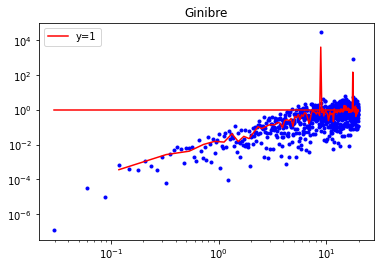

In [80]:
wave_binned_klatt, binned_klatt = binning_function (wave_klatt, si_klatt, 100)
plt.loglog(wave_klatt, si_klatt, 'b.')
plt.loglog(wave_klatt, np.ones_like(wave_klatt), 'r-', label="y=1")
plt.loglog(wave_binned_klatt, binned_klatt, 'r')
plt.title("Ginibre")
plt.legend()
plt.show()

In [64]:
x = np.linspace(0,10)
v = np.column_stack((x, x))
v

array([[ 0.        ,  0.        ],
       [ 0.20408163,  0.20408163],
       [ 0.40816327,  0.40816327],
       [ 0.6122449 ,  0.6122449 ],
       [ 0.81632653,  0.81632653],
       [ 1.02040816,  1.02040816],
       [ 1.2244898 ,  1.2244898 ],
       [ 1.42857143,  1.42857143],
       [ 1.63265306,  1.63265306],
       [ 1.83673469,  1.83673469],
       [ 2.04081633,  2.04081633],
       [ 2.24489796,  2.24489796],
       [ 2.44897959,  2.44897959],
       [ 2.65306122,  2.65306122],
       [ 2.85714286,  2.85714286],
       [ 3.06122449,  3.06122449],
       [ 3.26530612,  3.26530612],
       [ 3.46938776,  3.46938776],
       [ 3.67346939,  3.67346939],
       [ 3.87755102,  3.87755102],
       [ 4.08163265,  4.08163265],
       [ 4.28571429,  4.28571429],
       [ 4.48979592,  4.48979592],
       [ 4.69387755,  4.69387755],
       [ 4.89795918,  4.89795918],
       [ 5.10204082,  5.10204082],
       [ 5.30612245,  5.30612245],
       [ 5.51020408,  5.51020408],
       [ 5.71428571,

In [ ]:
sf_poisson = StructureFactor(data_poisson, intensity = 1/np.pi )
sf_ginibre = Str

In [38]:
n_pois/(max_ **2*np.pi)

0.3177906039111275

In [39]:
1/np.pi

0.3183098861837907

In [ ]:
#todo use homogenous poisson point function instead
def Poisson_process_in_rectangle(xMin, xMax, yMin, yMax, intensity):
    """
    this function simulate a poisson point process of intensity intensity, in a rectangle window     of R^2 of cooredinate (xMin, yMin), (xMax, yMax)
    """
    xDelta = xMax - xMin
    yDelta = yMax - yMin #rectangle dimensions
    total_area = xDelta * yDelta # area of the rectangle
    n_poisson = scipy.stats.poisson(intensity * total_area).rvs()#number of points of the poisson point process
    poisson_points = np.zeros((n_poisson, 2))
    poisson_points[:,0] = xDelta*scipy.stats.uniform.rvs(0, 1, ((n_poisson,1)))[:,0] + xMin #x coordinates of Poisson points
    poisson_points[:,1] = yDelta*scipy.stats.uniform.rvs(0, 1, ((n_poisson, 1)))[:,0] + yMin#y coordinates of Poisson points
    return (poisson_points, n_poisson)

In [ ]:
xMin = -100
yMin = xMin
xMax = 100
yMax = xMax
intensity_poisson= 1/np.pi
poisson_points, n_poisson = Poisson_process_in_rectangle(xMin, xMax, yMin, yMax, intensity_poisson)
poisson_points.shape

In [ ]:
plt.plot(poisson_points[:, 0], poisson_points[:, 1], 'b,')
plt.show()

In [ ]:
data_poisson = StructureFactor(poisson_points, intensity_poisson)

In [ ]:
norm_wave_vectors_poisson, scattering_intensity_poisson= data_poisson.compute_scattering_intensity(L=200, maximum_wave= 100 )

testing get_scattering_intensity_estimate on the poisson point process on a vector of waves


In [ ]:
norm_wave_vectors_poisson, scattering_intensity_poisson = data_poisson.estimate_scattering_intensity(L=200, maximum_wave= 100  )

In [ ]:
plt.figure(figsize=(7,7))
plt.loglog(norm_wave_vectors_poisson, scattering_intensity_poisson, 'b.')
plt.show()

testing get_scattering_intensity_estimate on the poisson point process on a meshgrid

In [ ]:
norm_wave_meshgrid_poisson, scattering_intensity_poisson_meshgrid = data_poisson.estimate_scattering_intensity(L=200, maximum_wave= 10, meshgrid_size = 200)

plt.figure(figsize=(7,7))
plt.loglog(norm_wave_meshgrid_poisson, scattering_intensity_poisson_meshgrid, 'b.')
plt.show()

In [ ]:
f_0 = plt.imshow(np.log10(scattering_intensity_poisson_meshgrid), extent=[-np.log10(scattering_intensity_poisson_meshgrid).shape[1] / 2.0, np.log10(scattering_intensity_poisson_meshgrid).shape[1] / 2.0, -np.log10(scattering_intensity_poisson_meshgrid).shape[0] / 2.0, np.log10(scattering_intensity_poisson_meshgrid).shape[0] / 2.0,], cmap="PRGn")
plt.colorbar(f_0)
plt.title("Scattering intensity")
plt.show()

In [ ]:
data_poisson.plot_scattering_intensity_estimate("all")

In [ ]:
data_poisson.plot_scattering_intensity_estimate("plot")

In [ ]:
data_poisson.plot_scattering_intensity_estimate("color_level")

In [ ]:
import pickle
with open('/Users/dhawat/github/structure-factor/data/data_big_intensity.dat', 'rb') as pickle_file:
    r_pois_2, n_pois_2, pois_2, push_2, equi_2, t_max, t_max_e = pickle.load(pickle_file, encoding="bytes")

import pickle
with open('/Users/dhawat/github/structure-factor/data/big_data_wit_tmaxe15.dat', 'rb') as pickle_file:
    r_pois, n_pois_1, pois_1, push_1, equi_1, r_vec_1, v_pois_1, v_push_1, v_equi_1, t_max, t_max_e = pickle.load(pickle_file, encoding="bytes")
with open('/Users/dhawat/github/structure-factor/data/big_gin_1.dat', 'rb') as pickle_file_2:
    n_gin, gin = pickle.load(pickle_file_2, encoding="bytes")

In [ ]:

my_data_pois = np.array([np.array(np.real(pois_1)).reshape(-1,), np.array(np.imag(pois_1)).reshape(-1,)]).T
my_data_equi = np.array([np.array(np.real(equi_1)).reshape(-1,), np.array(np.imag(equi_1)).reshape(-1,)]).T
my_data_push = np.array([np.array(np.real(push_1)).reshape(-1,), np.array(np.imag(push_1)).reshape(-1,)]).T
my_data_gin = np.array([np.array(np.real(gin)).reshape(-1,), np.array(np.imag(gin)).reshape(-1,)]).T

#data_equi = StructureFactor(my_data_equi)
#data_pois = StructureFactor(my_data_pois)
#data_push = StructureFactor(my_data_push)


In [ ]:
my_data_gin.shape

In [ ]:
data_gin = np.random.rand(1000, 2)
data_gin.shape

In [ ]:
sf_ginibre = StructureFactor(my_data_pois/200, intensity = 1/np.pi )
r_vec = np.linspace(0,50, 500)
pcf_ginibre = sf_ginibre.compute_pcf(radius=10, method="fv", fv= dict(spar=0.1,  method="a"))

In [ ]:
approx_pcf_gin

In [ ]:
import pandas as pd
approx_pcf_gin.replace([np.inf, -np.inf], np.nan, inplace=True)
cleaned_pd_pcf = pd.DataFrame.from_records(approx_pcf_gin).fillna(0) 

In [ ]:
cleaned_pd_pcf["r"]

In [ ]:
interpolated_pcf_cleaned = data_gin.interpolate_pair_correlation_function(r=cleaned_pd_pcf["r"], pcf_r=cleaned_pd_pcf["iso"], kind="cubic" )

In [ ]:
interpolated_pcf_cleaned(cleaned_pd_pcf["r"]) -1

In [ ]:
approx_pcf_gin.keys()

In [ ]:
interpolated_pcf = data_gin.interpolate_pair_correlation_function(r=approx_pcf_gin["r"], pcf_r=approx_pcf_gin["iso"], kind="cubic" )

In [ ]:
plt.plot(approx_pcf_gin["r"], interpolated_pcf_cleaned(approx_pcf_gin["r"]), 'b.' )
plt.show()

In [ ]:
plt.plot(approx_pcf_gin["r"], (approx_pcf_gin["iso"]), 'b.' )
plt.show()

In [ ]:
total_pcf(1)

In [ ]:
total_pcf = lambda r: interpolated_pcf_cleaned(r) -1.0

In [ ]:
interpolated_pcf(approx_pcf_gin["r"])

In [ ]:
data_gin = StructureFactor(my_data_gin, intensity = 1/np.pi )
r_vec = np.linspace(0,50, 500)
approx_pcf_gin = data_gin.estimate_pcf(100, 'fv', 'd', r_vec = r_vec, spar_=0.2 )
wave_lengh = np.linspace(1, 6, 1000 )
approx_sf_gin, k_min = data_gin.estimate_fourier('pcf','estimation_2',  k= wave_lengh, N = 160)

# trying to approximate g(0) (la pair correlation function) by Monte Carlo 

In [ ]:
r_pcf_ginibre = approx_pcf_gin["r"]
pcf_ginibre = approx_pcf_gin["pcf"]
intensity = 1/ np.pi
MC_ginibre = intensity* 2 * np.pi * np.sum((r_pcf_ginibre[:20]-1)*pcf_ginibre[:20])/ np.shape(r_pcf_ginibre)
MC_ginibre


In [ ]:
# the problem is the fluctuation when r get bigger the approximatiom of g are noise !!! so it gives big values that's why i go until 20 not to the end of the vectors

In [ ]:
my_data_equi2 = np.array([np.array(np.real(equi_2)).reshape(-1,), np.array(np.imag(equi_2)).reshape(-1,)]).T
data_equi2 = StructureFactor(my_data_equi2, intensity = 1/np.pi )
#r_vec = np.linspace(0,100, 500)
approx_pcf_equi2 = data_equi2.get_pcf_estimate(radius=200, args='ppp', correction_="best" )


In [ ]:
approx_pcf_equi2

In [ ]:
intensity_equi = 1/np.pi
r_pcf_equi = approx_pcf_equi2["r"]
pcf_equi = approx_pcf_equi2["iso"]
MC_equi = intensity_equi * 2* np.pi*np.sum((r_pcf_equi[:100]-1)*pcf_equi[:100])/ np.shape(r_pcf_equi)
MC_equi


In [ ]:
import matplotlib.pyplot as plt
plt.plot(r_pcf_ginibre[:100], pcf_ginibre[:100], 'b')
plt.title("pcf ginibre")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r_pcf_equi[:100], pcf_equi[:100], 'b')
plt.title("pcf_equi")
plt.show()

In [ ]:

wave_lengh = np.linspace(2, 30, 500 )
approx_sf_equi2, k_min_equi2 = data_equi2.get_fourier_estimate('iso','estimation_2', k= wave_lengh, h=0.1, N = 1000)

In [ ]:

wave_lengh = np.linspace(1.5, 30, 500 )
approx_sf_equi2, k_min_equi2 = data_equi2.get_fourier_estimate('iso','estimation_2', h=0.1, k= wave_lengh, N = 1000)

In [ ]:

sf_2_equi = data_equi2.get_fourier_estimate('iso','estimation_1')

In [ ]:
L_ = 640
x_pois = np.real(pois_2)
y_pois = np.imag(pois_2)
index_sq_pois = np.logical_and((np.abs(x_pois) < L_) , (np.abs(y_pois) < L_))
x_pois_sq = x_pois[index_sq_pois]
y_pois_sq = y_pois[index_sq_pois]

my_data_pois_rec = np.array([np.array(x_pois_sq).reshape(-1,), np.array(y_pois_sq).reshape(-1,)]).T
data_pois_sq = StructureFactor(my_data_pois_rec, intensity = 1/np.pi )

norm_k_pois_sq, sc_pois_sq = data_pois_sq.get_scattering_intensity_estimate(L = 2*L_, max_k = 1001 , arg="1D")



In [ ]:
data_pois_sq.plot_scattering_intensity_estimate(arg="plot")

In [ ]:
norm_k_pois_sq, sc_pois_sq = data_pois_sq.get_scattering_intensity_estimate(L = 2*L_, max_k = 100, n_k=100 , arg="2D")
data_pois_sq.plot_scattering_intensity_estimate(arg="all")